<a href="https://colab.research.google.com/github/ricardorda/multimidia/blob/master/ADS_Tumografia_Aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
from google.colab import drive
drive.mount('/content/drive')

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2
import numpy as np
import pandas as pd
import re
import math
from skimage import feature
from skimage.feature import hog
from imutils import paths
from google.colab.patches import cv2_imshow
import os

from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.models import Model
from keras.layers import Input

In [18]:
pastaRaiz = r"/content/drive/My Drive/Datasets/RYDLS20/"

outputXDeep = pastaRaiz +'X_deep.csv'
outputY = pastaRaiz +'y.csv'
#outputClassNames = pastaRaiz +'y.csv'


In [13]:
model = InceptionV3(include_top=False, weights='imagenet', pooling='avg', input_tensor=Input(shape=(299,299,3)))

class_names=[] 
X_deep = []
y = []

arquivos = os.listdir(pastaRaiz)

for pasta, classe in zip(arquivos, range(len(arquivos))):

  pastaAtual = pastaRaiz + pasta
  if(os.path.isfile(pastaAtual)):
    continue

  class_names.append(pasta)
  
  arquivos = os.listdir(pastaAtual)
  for arquivo in arquivos:
    arquivoAtual = pastaAtual + "/" + arquivo
    print(arquivoAtual)
    imagem = cv2.imread(arquivoAtual)
    
    # Extract deep features using InceptionV3 pretrained model 
    img = cv2.resize(imagem,(299,299))
    xd = image.img_to_array(img)
    xd = np.expand_dims(xd, axis=0)
    xd = preprocess_input(xd)
    deep_features = model.predict(xd)

    X_image_aux = []
    for aux in deep_features:
        X_image_aux = np.append(X_image_aux, np.ravel(aux))

    deep_features = [i for i in X_image_aux]

    y.append(pasta)
    X_deep.append(deep_features) #1000 linhas



# Saving the extracted features (deep) in a csv file
df = pd.DataFrame(X_deep)
df.to_csv(outputXDeep, header=False, index=False)

# Saving the classes in a csv file
df_class = pd.DataFrame(y)
df_class.to_csv(outputY, header=False, index=False)


/content/drive/My Drive/Datasets/RYDLS20/Normal/37.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/43.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/41.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/42.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/47.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/45.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/36.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/40.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/46.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/38.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/51.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/49.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/48.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/52.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/50.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/53.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/58.jpg
/content/drive/My Drive/Datasets/RYDLS20/Normal/57.jpg
/content/d

In [24]:
# Labels
y = pd.read_csv(outputY, header=None)
y=y.to_numpy()
y=np.ravel(y)
print(y.shape)

# deep features 2048 features
X = pd.read_csv(outputXDeep, header=None)
X=X.to_numpy()
print(X.shape)

class_names = ['COVID-19', 'MERS', 'Normal', 'Pneumocystis', 'SARS', 'Streptococcus', 'Varicella']

(1144,)
(1144, 2048)



Analisando Classificador  LogisticRegresson
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 46   3  39   0   0   1   1]
 [  3   0   7   0   0   0   0]
 [  8   0 991   1   0   0   0]
 [  4   0   3   3   0   1   0]
 [  4   0   4   0   2   1   0]
 [  3   0   3   0   1   4   1]
 [  3   0   6   0   0   0   1]]


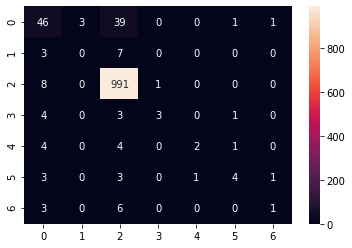

               precision    recall  f1-score   support

     COVID-19       0.65      0.51      0.57        90
         MERS       0.00      0.00      0.00        10
       Normal       0.94      0.99      0.97      1000
 Pneumocystis       0.75      0.27      0.40        11
         SARS       0.67      0.18      0.29        11
Streptococcus       0.57      0.33      0.42        12
    Varicella       0.33      0.10      0.15        10

     accuracy                           0.92      1144
    macro avg       0.56      0.34      0.40      1144
 weighted avg       0.90      0.92      0.90      1144


Analisando Classificador  NaiveBayes
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 63   1  23   0   2   0   1]
 [  3   2   5   0   0   0   0]
 [ 97   9 882   0   4   5   3]
 [  5   0   1   4   0   1   0]
 [  6   0   2   0   2   1   0]
 [  3   1   4   0   1   3   0]
 [  5   1   2   1   0   0   1]]


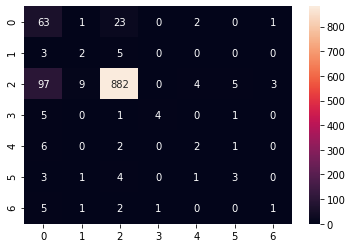

               precision    recall  f1-score   support

     COVID-19       0.35      0.70      0.46        90
         MERS       0.14      0.20      0.17        10
       Normal       0.96      0.88      0.92      1000
 Pneumocystis       0.80      0.36      0.50        11
         SARS       0.22      0.18      0.20        11
Streptococcus       0.30      0.25      0.27        12
    Varicella       0.20      0.10      0.13        10

     accuracy                           0.84      1144
    macro avg       0.42      0.38      0.38      1144
 weighted avg       0.88      0.84      0.85      1144


Analisando Classificador  KNN
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 13   0  77   0   0   0   0]
 [  1   0   9   0   0   0   0]
 [  7   0 993   0   0   0   0]
 [  2   0   7   1   0   0   1]
 [  5   0   6   0   0   0   0]
 [  1   1  10   0   0   0   0]
 [  1   0   9   0   0   0   0]]


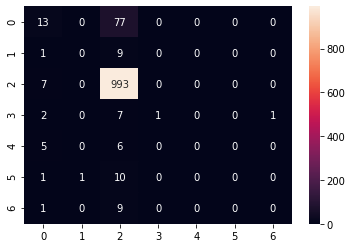

               precision    recall  f1-score   support

     COVID-19       0.43      0.14      0.22        90
         MERS       0.00      0.00      0.00        10
       Normal       0.89      0.99      0.94      1000
 Pneumocystis       1.00      0.09      0.17        11
         SARS       0.00      0.00      0.00        11
Streptococcus       0.00      0.00      0.00        12
    Varicella       0.00      0.00      0.00        10

     accuracy                           0.88      1144
    macro avg       0.33      0.18      0.19      1144
 weighted avg       0.82      0.88      0.84      1144


Analisando Classificador  RF
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[  8   0  82   0   0   0   0]
 [  1   0   9   0   0   0   0]
 [  1   0 999   0   0   0   0]
 [  2   0   9   0   0   0   0]
 [  3   0   8   0   0   0   0]
 [  1   0  11   0   0   0   0]
 [  1   0   9   0   0   0   0]]


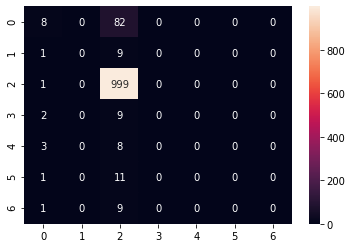

               precision    recall  f1-score   support

     COVID-19       0.47      0.09      0.15        90
         MERS       0.00      0.00      0.00        10
       Normal       0.89      1.00      0.94      1000
 Pneumocystis       0.00      0.00      0.00        11
         SARS       0.00      0.00      0.00        11
Streptococcus       0.00      0.00      0.00        12
    Varicella       0.00      0.00      0.00        10

     accuracy                           0.88      1144
    macro avg       0.19      0.16      0.16      1144
 weighted avg       0.81      0.88      0.83      1144


Analisando Classificador  DT+NB
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 68   0  21   0   0   0   1]
 [  4   1   4   0   0   1   0]
 [ 95  13 889   0   1   2   0]
 [  5   0   4   2   0   0   0]
 [  7   0   4   0   0   0   0]
 [  4   2   3   0   1   2   0]
 [  3   1   6   0   0   0   0]]


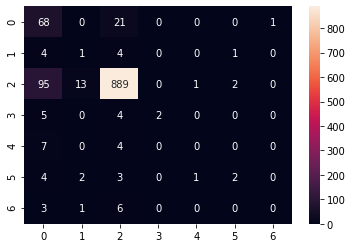

               precision    recall  f1-score   support

     COVID-19       0.37      0.76      0.49        90
         MERS       0.06      0.10      0.07        10
       Normal       0.95      0.89      0.92      1000
 Pneumocystis       1.00      0.18      0.31        11
         SARS       0.00      0.00      0.00        11
Streptococcus       0.40      0.17      0.24        12
    Varicella       0.00      0.00      0.00        10

     accuracy                           0.84      1144
    macro avg       0.40      0.30      0.29      1144
 weighted avg       0.88      0.84      0.85      1144


Analisando Classificador  DecisionTree
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 27   3  48   1   6   3   2]
 [  2   0   6   2   0   0   0]
 [ 41  10 910   4   5  16  14]
 [  4   0   3   1   1   1   1]
 [  2   0   7   0   1   1   0]
 [  2   1   5   0   1   3   0]
 [  1   1   8   0   0   0   0]]


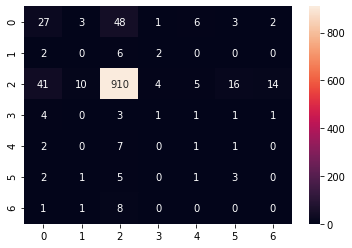

               precision    recall  f1-score   support

     COVID-19       0.34      0.30      0.32        90
         MERS       0.00      0.00      0.00        10
       Normal       0.92      0.91      0.92      1000
 Pneumocystis       0.12      0.09      0.11        11
         SARS       0.07      0.09      0.08        11
Streptococcus       0.12      0.25      0.17        12
    Varicella       0.00      0.00      0.00        10

     accuracy                           0.82      1144
    macro avg       0.23      0.23      0.23      1144
 weighted avg       0.84      0.82      0.83      1144


Analisando Classificador  MLP
---------------------
Dataset:  Deep Features
Confusion Matrix: 
[[ 15   0  75   0   0   0   0]
 [  1   0   9   0   0   0   0]
 [ 11   0 989   0   0   0   0]
 [  4   0   7   0   0   0   0]
 [  2   0   9   0   0   0   0]
 [  3   0   9   0   0   0   0]
 [  1   0   9   0   0   0   0]]


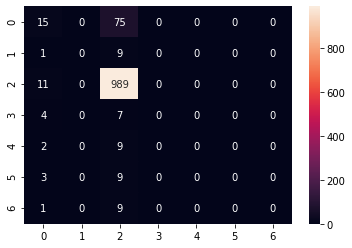

               precision    recall  f1-score   support

     COVID-19       0.41      0.17      0.24        90
         MERS       0.00      0.00      0.00        10
       Normal       0.89      0.99      0.94      1000
 Pneumocystis       0.00      0.00      0.00        11
         SARS       0.00      0.00      0.00        11
Streptococcus       0.00      0.00      0.00        12
    Varicella       0.00      0.00      0.00        10

     accuracy                           0.88      1144
    macro avg       0.19      0.17      0.17      1144
 weighted avg       0.81      0.88      0.84      1144



In [25]:
# 4 e 5 - Gerar e Plotar a matriz de confusão
from sklearn import  model_selection
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble  import AdaBoostClassifier
from sklearn.ensemble  import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


lr = LogisticRegression()
nb = GaussianNB(var_smoothing=1e-09)
knn = KNeighborsClassifier(n_neighbors=3)
dt =  DecisionTreeClassifier(criterion='entropy')
mlp = MLPClassifier(solver='sgd', early_stopping=True, hidden_layer_sizes=(100), activation='logistic', batch_size=100
                    , max_iter=10000, learning_rate_init=0.1, momentum=0.2, tol=1e-10, random_state=0)

# Define ensembles
rf = RandomForestClassifier(n_estimators=100, random_state=0)
dtnb = VotingClassifier(estimators=[('DecisionTree', dt), ('NaiveBayes', nb)], voting='soft')

titles = ['LogisticRegresson', 'NaiveBayes', 'KNN', 'RF', 'DT+NB', 'DecisionTree', 'MLP']
classificadores = [lr, nb, knn, rf, dtnb, dt, mlp]

# Testando em todos os datasets para ver qual o melhor
datasets = [X]
labels = ['Deep Features']

folds = 10
y_true = y

for method, title in zip(classificadores, titles):
  print("")
  print("============================================================")
  print("Analisando Classificador ", title)
  for dataset, name in zip(datasets, labels):
    result = model_selection.cross_validate(method, X=dataset, y=y_true, cv=folds)
    y_pred = model_selection.cross_val_predict(method, dataset, y=y_true, cv=folds)
    cm = confusion_matrix(y_true, y_pred)
    print("---------------------")
    print("Dataset: ", name)
    print("Confusion Matrix: ")
    print(cm)
    sn.heatmap(cm,annot=True,fmt="d") # font size
    plt.show()

    print(classification_report(y_true, y_pred, target_names=class_names))